# Name: N.Suresh
# Roll NO:21X05A6738
# Branch: CSE(Data Science)

# Project Title:
# Analysis and Prediction of "mall_customers.csv" of American mall markets called as Phonix small
# To find out how many customers are visited to a particular shop. 
# On the basis of these prediction of Annual income vs Spending scores.

# Disclaimer: 
# In this particular dataset we assume Annual income as a centoid and Spending score from range 1-100 called as datanodes of the cluster

# Problem Statement: 
# The American Finance market as per GDP of 2011 'Phonix_trillums' are as the first range out of five.
# The owner wants to be Exact which particular shop or product search in different kind of clusters in entire mall.
# As a DataScience Engineer predict the futuristic financial market for upcoming GDP rate based on No. of clusters.
# The client want atleast 5 top clusters(shop).

# Conclusion: 
# According to model basis prediction using ML algorithm KMeans clustering we found that cluter were consist re color is a highest cluster which attached morethan 50 datanodes.

# References: The model building algorithm develop for all kinds of cluteration values. The yellow spot represent centroid which max value is 3

In [32]:
#import the numpy, matlot, pandas libery's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#Read the dataset take variable name called "dataset" only.
data=pd.read_csv('Mall_Customers.csv')
print(data)
# without printing this data add in separet variable as input variable Caqpital X only. loc index by select the all row ,
#and give the required colum index like[3,4].for this particular dataset.
X=data.iloc[:,[3,4]].values
X

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


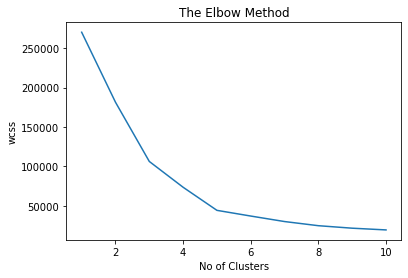

In [34]:
## <THE ELBOW METHOD>
#from sklearn used "sklearn.cluster" attribute and import KMeans
from sklearn.cluster import KMeans
#Take a distance from centroid to cluster point with WrapsColumnExpression.
wcss=[]
# Assume you have 10 cluster and iterate the for up to range 10 with iterater kmeans++.
for i in range(1,11):
# Fit the model if value comes too samlla in range.
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
#For clustering in wcss ,inertia is adding / appending is required.(kmeans.inertia_)#defalut usecase.
    wcss.append(kmeans.inertia_)
#Plot the particular graph along with the wcss and your range which you taken as input variable.
plt.plot(range(1,11),wcss)
#Add title "The Elbow Method".
plt.title('The Elbow Method')
#Lable x variable as "No of Customers".
plt.xlabel('No of Clusters')
#Lable y variable as "WCSS".
plt.ylabel('wcss')
#Plot the graph using plt.show().
plt.show()

In [35]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    y_kmeans=kmeans.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


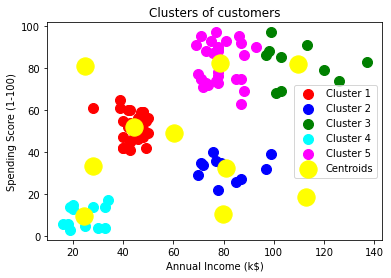

In [37]:
# Take any no of cluster and run you take 5.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()